In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting Started
* get from the url
* store in DB
* retrieve from DB and filter-> store in csv
* read from csv OR directly load from json in the response
* #df = pd.DataFrame(d,columns=['Name','Age','Score'])


In [2]:
country_data = pd.read_csv('capitals_and_data.csv')
country_capitals = pd.read_csv('country-capitals.csv')

In [15]:
print(country_data)
print(country_capitals)




## merge the two datasets using pandas
* needs renaming CapitalName column to Capital

In [16]:
country_capitals.rename(columns={'CapitalName':'Capital'}, inplace=True)
result = pd.merge(country_capitals, country_data, on='Capital', how='inner', validate=None)
#result.rename(columns={'Literacy (%)':'Literacy'}, inplace=True)
result

## Do CRUD operations on data
* add a row
* drop some rows based on a condition
* modify rows based on condition


In [21]:
#data drop
#result = result[result.Population>28748]
result.drop((result.Population>28748).index)
result
#result['Population'].min()

## data cleaning
* replace "," with "." in literacy

## find properties in the data using Numpy
* mean and standard deviation of literacy
* correlation coefficient between GDP and literacy

In [22]:
#statistical properties of data- mean and std dev
result.rename(columns={'Literacy (%)':'Literacy'}, inplace=True)
# df1 = result[result.Literacy!=None]
lit = [float(str(i).replace(',','.')) for i in list(result['Literacy'])]
lit

In [7]:
gdp  = result['GDP ($ per capita)']

In [8]:
np.mean(lit)

82.30055555555555

In [9]:
np.std(lit)

20.1152029216771

In [10]:
print(np.corrcoef(result['GDP ($ per capita)'], lit))

[[1.         0.52209966]
 [0.52209966 1.        ]]


Plotting
* Plot histogram of GDP
* Plot histogram of literacy
* scatter plot of literacy vs GDP

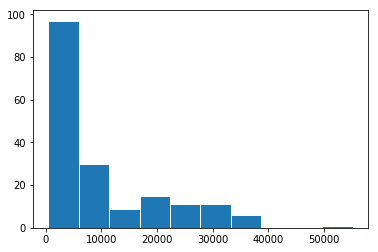

In [11]:
plt.hist(result['GDP ($ per capita)'],  edgecolor ='w')
plt.show()

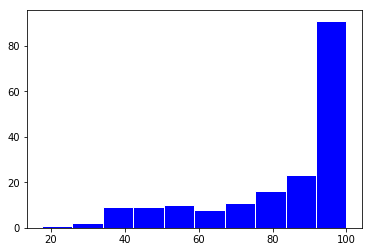

In [12]:
plt.hist(lit, color = 'b', edgecolor ='w')
plt.show()

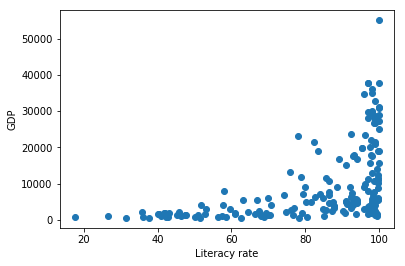

In [13]:
plt.scatter(lit, gdp)
plt.xlabel('Literacy rate')
plt.ylabel('GDP')
plt.show()

## some more analysis
*standard deviation of of GDP grouped by continent

In [14]:
result.groupby('ContinentName')['GDP ($ per capita)'].std()

ContinentName
Africa              2809.670957
Asia                8228.979132
Australia          11463.829884
Central America    11964.622093
Europe             11909.194761
North America      12793.188884
South America       3329.334723
Name: GDP ($ per capita), dtype: float64